In [24]:
import os
import pathlib
import geopandas as gpd

import pandas as pd
import rioxarray as rxr

# Import packages
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [ ]:
# Load stored objects

%store -r srtm_c_da maca_df curl_gdf

In [27]:
srtm_c_da.plot()

Error in callback <function _draw_all_if_interactive at 0x0000017D02929DA0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 1.71 GiB for an array with shape (8444, 6805, 4) and data type float64

MemoryError: Unable to allocate 1.71 GiB for an array with shape (8444, 6805, 4) and data type float64

<Figure size 640x480 with 2 Axes>

In [ ]:
maca_df.drop('da', axis='columns')

,site_name,variable,start_year
0,lmis,pr,2096


MemoryError: Unable to allocate 37.1 MiB for an array with shape (38918880,) and data type bool

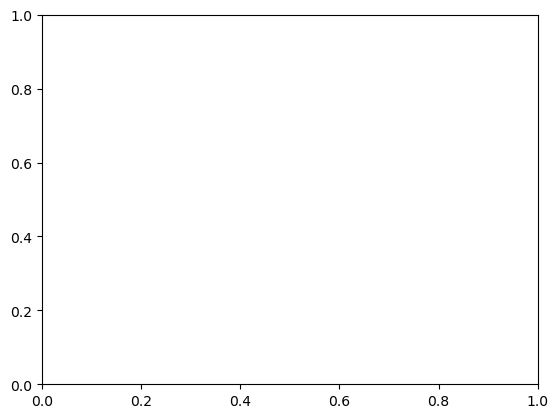

In [ ]:
(maca_df[(maca_df.start_year==2096) 
         & (maca_df.variable=='pr')]
         .da.values.item()
).plot.hist()

In [ ]:
# define "maca_2096_original_da" (in this case, maca precipitation data projected forward to the year 2096)

maca_2096_original_da = (
    maca_df
    [(maca_df.start_year==2096) & (maca_df.variable=='pr')]
    .da.values.item()
    .groupby('time.year')
    .sum()
    .min('year')
    .rio.write_crs(4326)
    .rio.set_spatial_dims(y_dim='lat', x_dim='lon')
)

MemoryError: Unable to allocate 37.1 MiB for an array with shape (12, 585, 1386) and data type float32

In [ ]:
maca_2096_original_da

<xarray.DataArray 'precipitation' (lat: 585, lon: 1386)> Size: 3MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat          (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
    crs          int32 4B 1
  * lon          (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.11 -67.06
    spatial_ref  int64 8B 0

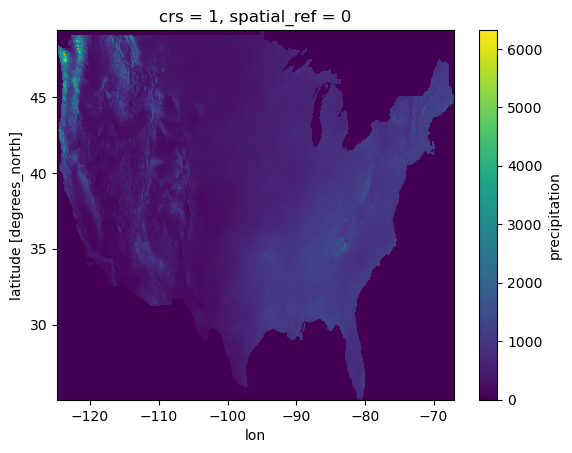

In [ ]:
maca_2096_original_da.plot()

In [ ]:
curl_gdf.total_bounds

array([-104.04559273,   46.28004861, -102.65555052,   48.12513035])

In [ ]:
# reproject the curl_gdf to the same crs as maca_2096_original_da

curl_gdf.to_crs(maca_2096_original_da.rio.crs)

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
19,295520010328,Little Missouri National Grassland,1025317.517,0.492748,60.421675,"MULTIPOLYGON (((-104.01688 47.51793, -104.0115..."


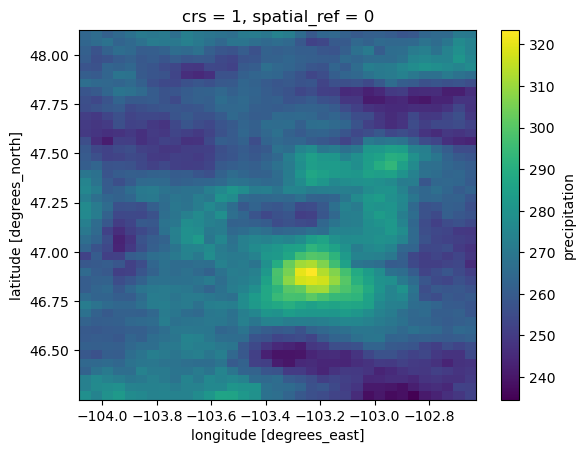

In [ ]:
# Clip the maca raster to the bounds of the curl gdf.

maca_2096_cropped = maca_2096_original_da.rio.clip_box(
    *curl_gdf.to_crs(maca_2096_original_da.rio.crs).total_bounds
    )
maca_2096_cropped.plot()

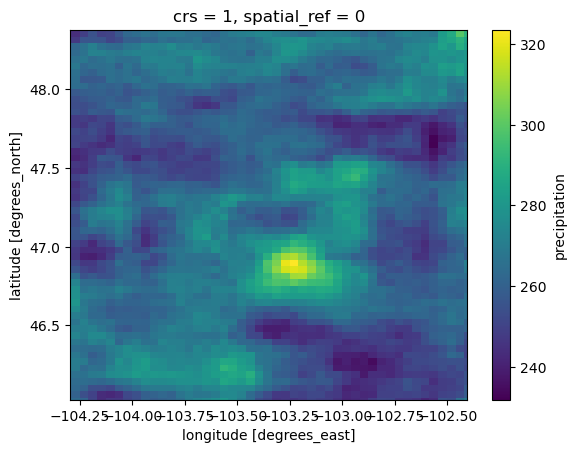

In [ ]:
# Harmonize the maca data with the srtm data by reprojecting the maca raster into the same crs as srtm_c_da

maca_2096_da = maca_2096_original_da.rio.reproject_match(srtm_c_da)
maca_2096_da.plot()

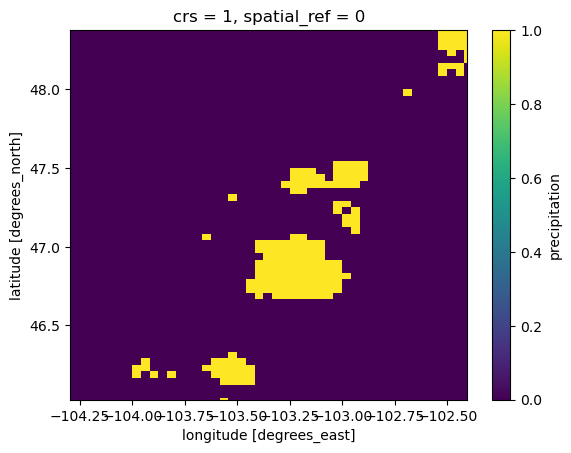

In [ ]:
# Input precipitation tolerance value from research. 
# For subsequent runs with different species, update this to match the new tolerance value.

maca_suitable = maca_2096_da > 280
maca_suitable.plot()

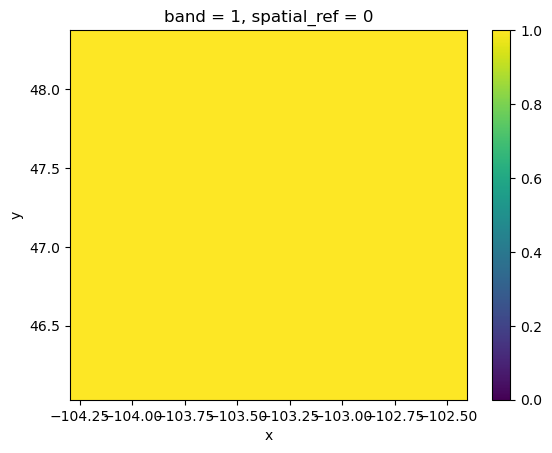

In [ ]:
# Input elevation tolerance value from research
# For subsequent runs with different species, update this value to match the new species tolerance.

srtm_suitable_da = srtm_c_da < 1700
srtm_suitable_da.plot()

In [ ]:
# find areas with suitable precip and elevation for Sorghastrum nutans, by multiplying the suitability rasters together to create a combined raster.

suitable_2096 = maca_suitable * srtm_suitable_da
suitable_2096.plot()

MemoryError: Unable to allocate 1.71 GiB for an array with shape (8444, 6805, 4) and data type float64

<Figure size 640x480 with 2 Axes>